
#**Machine Learning And Data Science Laboratory(410501)**

#BE Sem I Honors in ML&DS

#Academic Year: 2022-23

#Lab Assignment No.5 



**NAME : CHITTARANJAN RATHOD**

**ROLL NO : 42457**

**PRN NO : 72017193J**

**ABC ID : 129-879-043-197**

**BRANCH : E&TC**

**COLLEGE : PICT**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv(r"/content/train.csv")
test = pd.read_csv(r"/content/test.csv")

In [ ]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


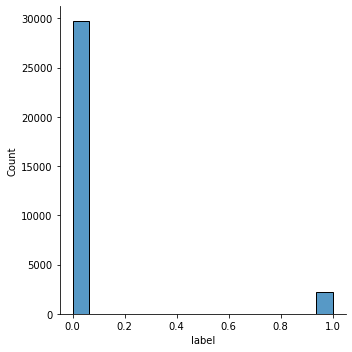

In [ ]:
sns.displot(train['label'])

In [ ]:
label_cnt = train['label'].value_counts()
label_cnt

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
label_pct = train['label'].value_counts() / len(train)
label_pct

0    0.929854
1    0.070146
Name: label, dtype: float64

In [ ]:
label = train['label']

train.drop(['label'], axis=1, inplace=True)
train

,id,tweet
0,1,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,3,bihday your majesty
3,4,#model i love u take with u all the time in ...
4,5,factsguide: society now #motivation
...,...,...
31957,31958,ate @user isz that youuu?ðððððð...
31958,31959,to see nina turner on the airwaves trying to...
31959,31960,listening to sad songs on a monday morning otw...
31960,31961,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
combi = train.append(test)
combi

,id,tweet
0,1,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,3,bihday your majesty
3,4,#model i love u take with u all the time in ...
4,5,factsguide: society now #motivation
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [ ]:
tweets = combi['tweet']

count_words = tweets.str.findall(r'(\w+)').str.len()
print(count_words.sum())

681137


In [ ]:
import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords

tweets = tweets.str.lower()


tweets = tweets.apply(lambda x : re.sub("[^a-z\s]","",x) )


tweets = tweets.str.replace("#", " ")


tweets = tweets.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


stopwords = set(stopwords.words("english"))
tweets = tweets.apply(lambda x : " ".join(word for word in x.split() if word not in stopwords ))


count_words = tweets.str.findall(r'(\w+)').str.len()
print(count_words.sum())

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

394674


In [ ]:
most_freq_words = pd.Series(' '.join(tweets).lower().split()).value_counts()[:25]
tweets = tweets.apply(lambda x : " ".join(word for word in x.split() if word not in most_freq_words ))
print(most_freq_words)

count_words = tweets.str.findall(r'(\w+)').str.len()
print(count_words.sum())

user        27008
love         4217
day          3471
happy        2630
amp          2433
time         1745
life         1719
today        1555
new          1546
like         1527
positive     1423
get          1406
thankful     1403
people       1331
bihday       1327
good         1313
cant         1239
one          1219
see          1136
fathers      1134
dont         1133
smile        1077
want          986
healthy       962
take          945
dtype: int64
328789


In [ ]:
from collections import Counter
from itertools import chain

v = tweets.str.split().tolist() 

c = Counter(chain.from_iterable(v))

tweets = [' '.join([j for j in i if c[j] > 1]) for i in v]

total_word = 0
for x,word in enumerate(tweets):
    num_word = len(word.split())
   
    total_word = total_word + num_word
print(total_word)

296750


In [ ]:
X = np.array(tweets[: len(train)])
y = label

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val, y_train, y_val = train_test_split(X,y, stratify=y, test_size=0.3, random_state=1)
X_train.shape, y_train.shape, X_val.shape,y_val.shape

((22373,), (22373,), (9589,), (9589,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=0.01)
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.astype('U'))
val_tfIdf = vectorizer_tfidf.transform(X_val.astype('U'))
print(vectorizer_tfidf.get_feature_names()[:5])


['affirmation', 'amazing', 'beautiful', 'best', 'blog']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_tfIdf.shape,  val_tfIdf.shape

((22373, 45), (9589, 45))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5).fit(train_tfIdf, y_train)
print(model.score(train_tfIdf, y_train))

0.9304071872346131


In [ ]:
y_pred = model.predict(val_tfIdf)
print(model.score(val_tfIdf, y_val))

0.9313797059130253


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred))

[[8881   35]
 [ 623   50]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8916
           1       0.59      0.07      0.13       673

    accuracy                           0.93      9589
   macro avg       0.76      0.54      0.55      9589
weighted avg       0.91      0.93      0.91      9589

